Import required libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

Load the dataset

In [ ]:
df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Drop columns that are not useful or have too many missing values

In [ ]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
existing_cols = [col for col in cols_to_drop if col in df.columns]
df.drop(existing_cols, axis=1, inplace=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Here we are dropped the columns which we don't needed while applying decsion tree.

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


Here we are managing missing values there are many null values occured in this datafram which we must to handle it properly.Without handling missing values we dont get accurrate result.

Now we are applying label encoding.Because cannot handle labels directly So, we need to convert categorical data to numbers.

In [ ]:
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Embarked'] = label_enc.fit_transform(df['Embarked'])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


This step is used to convert categorical columns into numeric format so they can be used by machine learning algorithms which require numerical inputs

In [ ]:
X = df.drop('Survived' , axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)

In this dataset was divided into features(X) and target(y), where Survived was selected as the target column.After that the data was split into training and testing sets using 70-30 ratio. This allows us to train the model on one part of the data and evalute its performance on unseen data, which is crucial for assessing its generalization ability.

Training Accuracy: 0.9807383627608347
Testing Accuracy: 0.7574626865671642


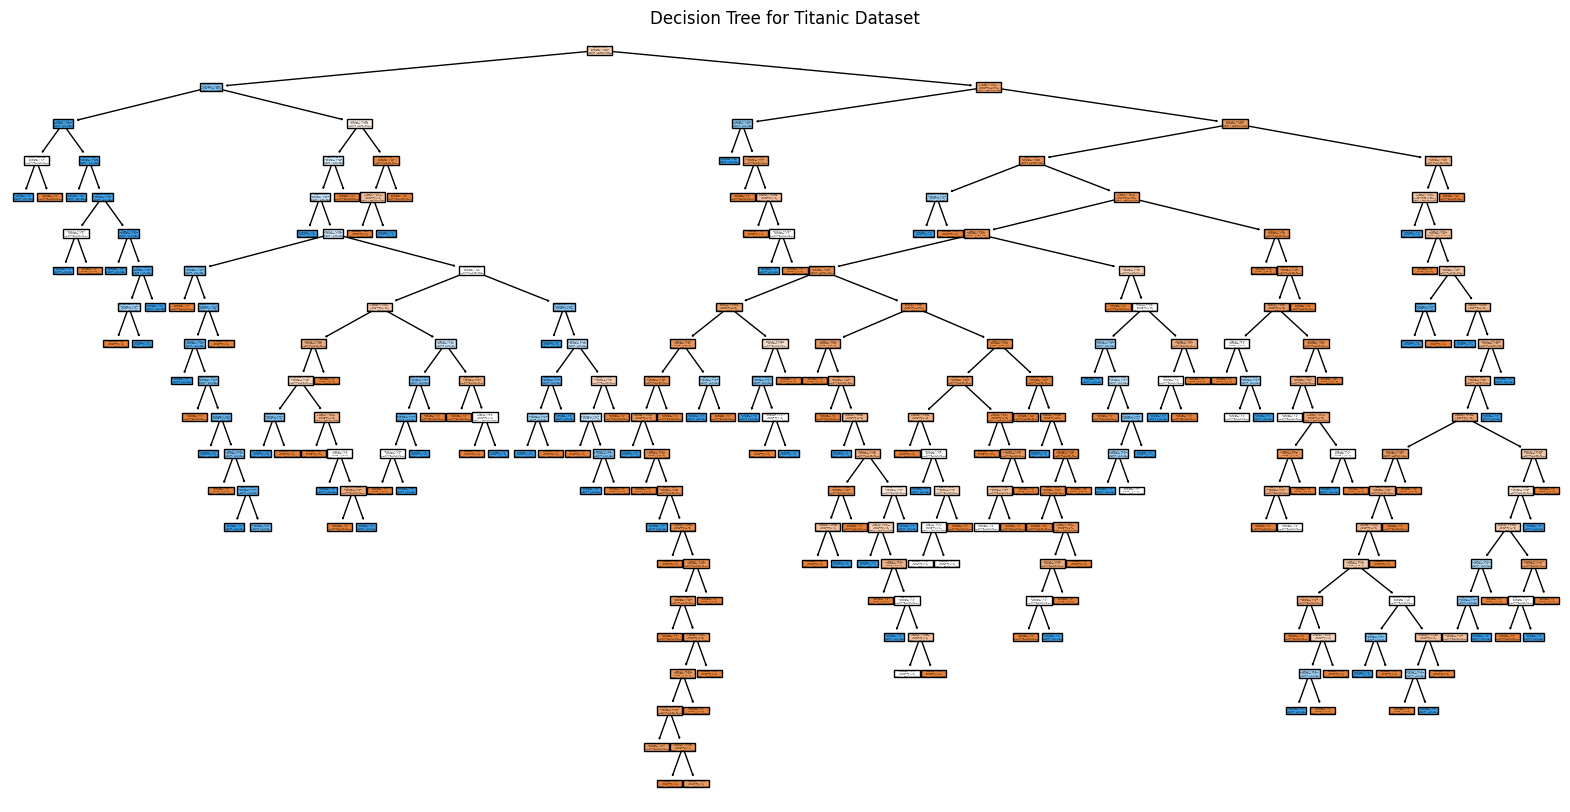

In [ ]:
import matplotlib.pyplot as plt
clf_tree = DecisionTreeClassifier(criterion='entropy')
clf_tree.fit(X_train, y_train)

y_pred_train = clf_tree.predict(X_train)
y_pred_test = clf_tree.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:" , train_accuracy)
print("Testing Accuracy:" , test_accuracy)

plt.figure(figsize=(20,10))  # Set the figure size (width, height)
plot_tree(clf_tree, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Decision Tree for Titanic Dataset")
plt.show()

In training accuracy tree fits trainning data very well.
In test accuracy model doesn't generalize well to new/unseen data

if the gap is large e.g >15%,

Parameter Prunning

Pruned Decision Tree Accuracy (Test): 0.8171641791044776


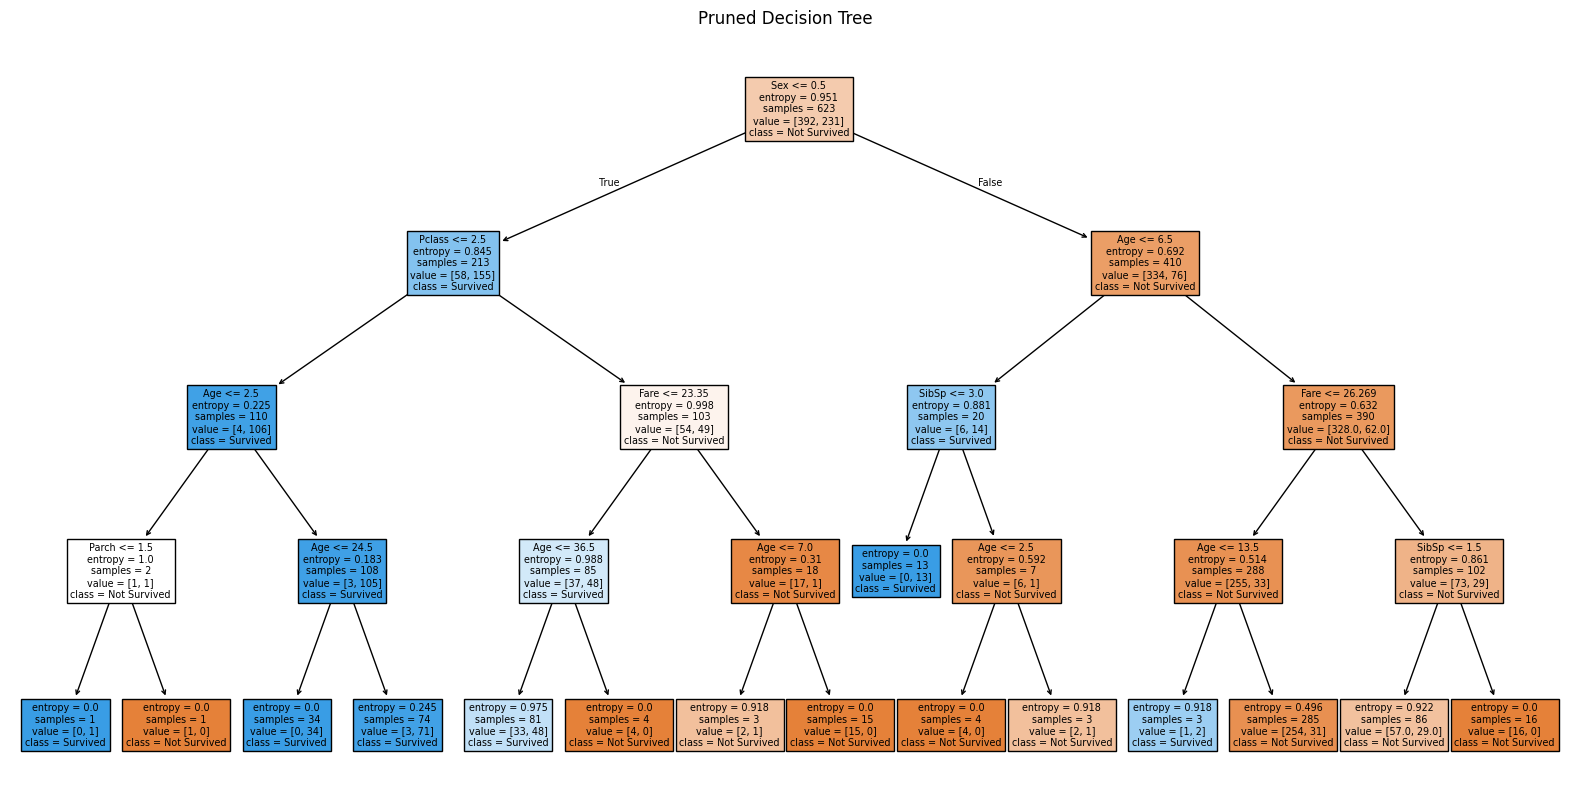

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Apply pruning with controlled parameters
clf_pruned = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    random_state=42
)

clf_pruned.fit(X_train, y_train)
y_pred_pruned = clf_pruned.predict(X_test)

print("Pruned Decision Tree Accuracy (Test):", accuracy_score(y_test, y_pred_pruned))

plt.figure(figsize=(20,10))
plot_tree(clf_pruned, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Pruned Decision Tree")
plt.show()


Pruning reduces the tree size by controlling


Depth of the tree.
Minimum samples required to split.
Minimum samples per leaf.

This helps:
Improve generalization
Reduce overfitting
Make the model simpler to interpret